In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt

In [5]:
transaction_df=pd.read_excel('KPMG_VI_New_raw_data_update_final.excel.csv','Transactions')
CustomerDemographic_df=pd.read_excel('KPMG_VI_New_raw_data_update_final.excel.csv','CustomerDemographic')
CustomerAddress_df=pd.read_excel('KPMG_VI_New_raw_data_update_final.excel.csv','CustomerAddress')

In [6]:
print(transaction_df.columns)
print(CustomerDemographic_df.columns)
print(CustomerAddress_df.columns)

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date'],
      dtype='object')
Index(['customer_id', 'name', 'gender', 'past_3_years_bike_related_purchases',
       'DOB', 'age', 'job_title', 'job_industry_category', 'wealth_segment',
       'deceased_indicator', 'owns_car', 'tenure'],
      dtype='object')
Index(['customer_id', 'address', 'postcode', 'state', 'country',
       'property_valuation'],
      dtype='object')


In [8]:
# Merging dataframes
df1=transaction_df.merge(CustomerDemographic_df, how='outer', on='customer_id')
df2=df1.merge(CustomerAddress_df,how='outer', on='customer_id')
df2

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation
0,1.0,2.0,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,...,Financial Services,Mass Customer,N,Yes,10.0,984 Hoepker Court,3064.0,VIC,Australia,6.0
1,11065.0,1.0,2950,2017-10-16,0.0,Approved,Giant Bicycles,Standard,medium,medium,...,Financial Services,Mass Customer,N,Yes,10.0,984 Hoepker Court,3064.0,VIC,Australia,6.0
2,18923.0,62.0,2950,2017-04-26,0.0,Approved,Solex,Standard,medium,medium,...,Financial Services,Mass Customer,N,Yes,10.0,984 Hoepker Court,3064.0,VIC,Australia,6.0
3,2.0,3.0,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,...,Health,Mass Customer,N,Yes,10.0,4 Shopko Circle,2196.0,NSW,Australia,5.0
4,6862.0,4.0,3120,2017-10-05,0.0,Approved,Giant Bicycles,Standard,high,medium,...,Health,Mass Customer,N,Yes,10.0,4 Shopko Circle,2196.0,NSW,Australia,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20505,NaN,NaN,3949,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,Manufacturing,High Net Worth,N,Yes,1.0,28 Toban Center,3756.0,VIC,Australia,2.0
20506,NaN,NaN,3997,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,Manufacturing,High Net Worth,N,Yes,1.0,4 Dovetail Crossing,2350.0,NSW,Australia,2.0
20507,NaN,NaN,4001,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,87 Crescent Oaks Alley,2756.0,NSW,Australia,10.0
20508,NaN,NaN,4002,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,8194 Lien Street,4032.0,QLD,Australia,7.0


In [9]:
df1.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,gender,past_3_years_bike_related_purchases,DOB,age,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,1.0,2.0,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,...,Male,19.0,1955-01-11 00:00:00,69.0,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0
1,11065.0,1.0,2950,2017-10-16,0.0,Approved,Giant Bicycles,Standard,medium,medium,...,Male,19.0,1955-01-11 00:00:00,69.0,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0
2,18923.0,62.0,2950,2017-04-26,0.0,Approved,Solex,Standard,medium,medium,...,Male,19.0,1955-01-11 00:00:00,69.0,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0
3,2.0,3.0,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,...,Female,89.0,1979-02-04 00:00:00,45.0,Clinical Specialist,Health,Mass Customer,N,Yes,10.0
4,6862.0,4.0,3120,2017-10-05,0.0,Approved,Giant Bicycles,Standard,high,medium,...,Female,89.0,1979-02-04 00:00:00,45.0,Clinical Specialist,Health,Mass Customer,N,Yes,10.0


In [10]:
df1.describe()

,transaction_id,product_id,customer_id,transaction_date,online_order,list_price,standard_cost,product_first_sold_date,past_3_years_bike_related_purchases,age,tenure
count,20000.000000,20000.00000,20507.000000,20000,19640.000000,20000.000000,19803.000000,19803.000000,20504.000000,20495.000000,20047.000000
mean,10000.500000,45.36465,1787.412298,2017-07-01 14:08:05.280000,0.500458,1107.829449,556.046951,38199.776549,48.789602,47.794535,10.678256
min,1.000000,0.00000,1.000000,2017-01-01 00:00:00,0.000000,12.010000,7.210000,33259.000000,0.000000,21.000000,1.000000
25%,5000.750000,18.00000,883.000000,2017-04-01 00:00:00,0.000000,575.270000,215.140000,35667.000000,24.000000,37.000000,6.000000
50%,10000.500000,44.00000,1781.000000,2017-07-03 00:00:00,1.000000,1163.890000,507.580000,38216.000000,48.000000,46.000000,11.000000
75%,15000.250000,72.00000,2676.500000,2017-10-02 00:00:00,1.000000,1635.300000,795.100000,40672.000000,73.000000,56.000000,15.000000
max,20000.000000,100.00000,5034.000000,2017-12-30 00:00:00,1.000000,2091.470000,1759.850000,42710.000000,99.000000,124.000000,22.000000
std,5773.647028,30.75359,1046.849606,NaN,0.500013,582.825242,405.955660,2875.201110,28.621405,16.971692,5.673263


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Solex'),
  Text(1, 0, 'Giant Bicycles'),
  Text(2, 0, 'Trek Bicycles'),
  Text(3, 0, 'WeareA2B'),
  Text(4, 0, 'OHM Cycles'),
  Text(5, 0, 'Norco Bicycles')])

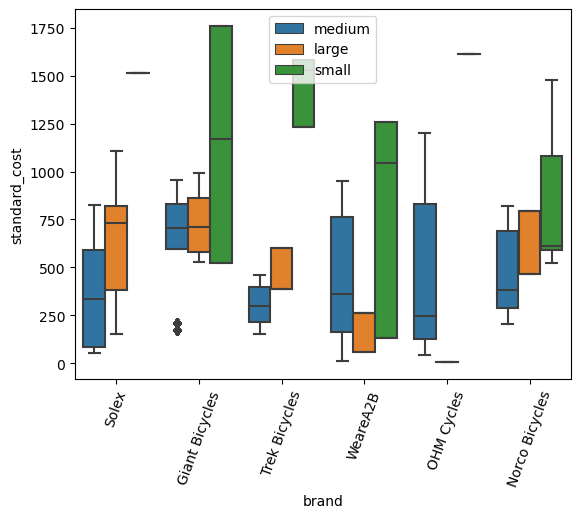

In [10]:
sns.boxplot(x='brand',y='standard_cost',hue='product_size',data=df1)
plt.legend(loc = 'best')#品牌standard_cost 箱型图
plt.xticks(rotation=70)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Solex'),
  Text(1, 0, 'Giant Bicycles'),
  Text(2, 0, 'Trek Bicycles'),
  Text(3, 0, 'WeareA2B'),
  Text(4, 0, 'OHM Cycles'),
  Text(5, 0, 'Norco Bicycles')])

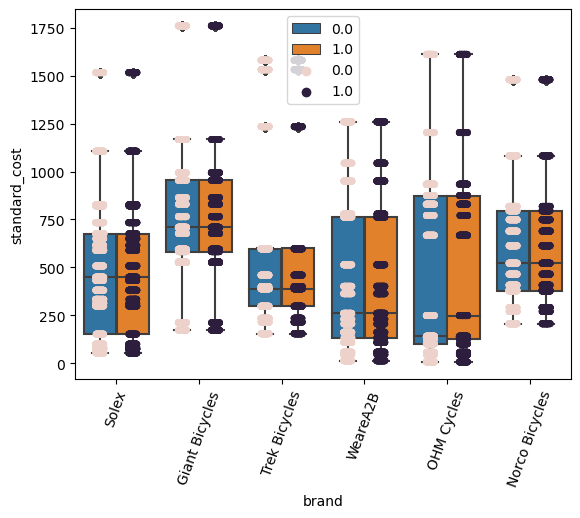

In [11]:
sns.boxplot(x='brand',y='standard_cost',hue='online_order',data=df2)
#plt.legend(loc = 'best')#品牌standard_cost 箱型图
sns.stripplot(x='brand',y='standard_cost',hue='online_order',data=df2,dodge=True) 
plt.legend(loc='best')
plt.xticks(rotation=70)

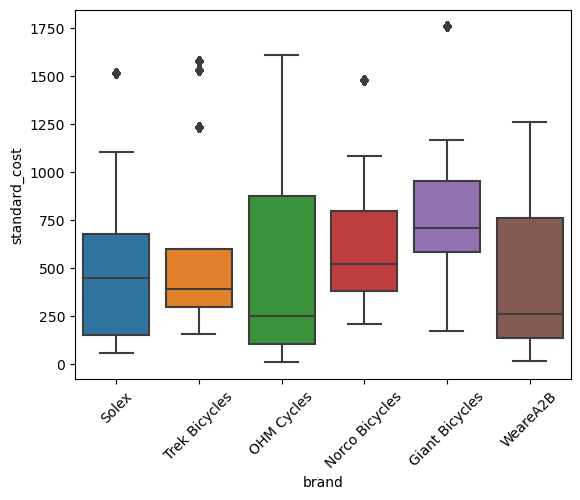

In [14]:
sns.boxplot(x='brand', y='standard_cost', data=transaction_df)
plt.xticks(rotation=45)  # If you have many brands and want to avoid label overlap
plt.show()

In [12]:
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   transaction_id                       20000 non-null  float64       
 1   product_id                           20000 non-null  float64       
 2   customer_id                          20507 non-null  int64         
 3   transaction_date                     20000 non-null  datetime64[ns]
 4   online_order                         19640 non-null  float64       
 5   order_status                         20000 non-null  object        
 6   brand                                19803 non-null  object        
 7   product_line                         19803 non-null  object        
 8   product_class                        19803 non-null  object        
 9   product_size                         19803 non-null  object        
 10  list_price

In [30]:
#inspect missing values in the dataset
print(df2.isnull().values.sum())
#Replace the ''s with NaN
df2.fillna(numeric_means, inplace=True)
missing_values_count = df2.isnull().values.sum()
numeric_means= df2.select_dtypes(include=[np.number]).mean()
print(missing_values_count)
transaction_df=df2.replace("", np.NaN)
#impute the missing values with mean imputation
transaction_df=df2.fillna(df2.mean())
print(df2.isnull().values.sum())
# Assuming df2 is the DataFrame you're working with and you want to fill NA values with the mean of each column
# Ensure to calculate mean only for numeric columns
transaction_df = df2.fillna(df2.mean(numeric_only=True))
# For categorical columns, you might fill missing values with the mode or 'Unknown'

1
1


TypeError: Could not convert ['CompletePendingCompleteComplete'] to numeric

In [16]:
import numpy as np
import pandas as pd

# Assuming transaction_df is your DataFrame
# Replace empty strings with np.NaN
df2 = df2.replace("", np.NaN)

# Select only numeric columns for mean calculation
numeric_cols = df2.select_dtypes(include=[np.number])

# Calculate mean only for numeric columns and fill NA values
df2[numeric_cols.columns] = numeric_cols.fillna(numeric_cols.mean())

# If you want to see how many missing values are left
print(df2.isnull().sum())

transaction_id                         0
product_id                             0
customer_id                            0
transaction_date                       1
online_order                           0
order_status                           0
brand                                  0
product_line                           0
product_class                          0
product_size                           0
list_price                             0
standard_cost                          0
product_first_sold_date                0
name                                   0
gender                                 0
past_3_years_bike_related_purchases    0
DOB                                    0
age                                    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
dtype: int64


In [17]:
import numpy as np
import pandas as pd

# Replace empty strings with NaN for all columns
df2.replace("", np.NaN, inplace=True)

# Fill numeric columns with their mean values
df2.fillna(df2.select_dtypes(include=[np.number]).mean(), inplace=True)

# For categorical columns, consider filling missing values with the mode or a placeholder
# Here's an example of filling with the mode for the 'brand' column
df2['brand'].fillna(df2['brand'].mode()[0], inplace=True)

# Verify the remaining missing values
print(df2.isnull().sum())

# Info to see the data types and non-null count after imputation
print(df2.info())

transaction_id                         0
product_id                             0
customer_id                            0
transaction_date                       1
online_order                           0
order_status                           0
brand                                  0
product_line                           0
product_class                          0
product_size                           0
list_price                             0
standard_cost                          0
product_first_sold_date                0
name                                   0
gender                                 0
past_3_years_bike_related_purchases    0
DOB                                    0
age                                    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
dtype: int64
<cl

In [18]:
# Replacing empty strings with NaN for proper NaN recognition
df2.replace("", np.NaN, inplace=True)

# Imputing missing values in numeric columns with their mean
numeric_means = df2.select_dtypes(include=[np.number]).mean()
df2.fillna(numeric_means, inplace=True)

In [19]:
# Example: Imputing missing values in 'product_line' with the mode
df2['product_line'].fillna(df2['product_line'].mode()[0], inplace=True)

# For other columns, repeat the process with appropriate logic
# For datetime or complex object types, consider your specific use case


In [20]:
missing_values_after_imputation = df2.isnull().sum()
print(missing_values_after_imputation)


transaction_id                         0
product_id                             0
customer_id                            0
transaction_date                       1
online_order                           0
order_status                           0
brand                                  0
product_line                           0
product_class                          0
product_size                           0
list_price                             0
standard_cost                          0
product_first_sold_date                0
name                                   0
gender                                 0
past_3_years_bike_related_purchases    0
DOB                                    0
age                                    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
dtype: int64


In [24]:
# 假设 df2 是您的原始 DataFrame
# 替换空字符串为 np.NaN，确保缺失值被正确处理
df2 = df2.replace("", np.NaN)

# 计算数值型列的均值
numeric_means = df2.select_dtypes(include=[np.number]).mean()

# 仅使用数值型列的均值填充这些列中的缺失值
df2.fillna(numeric_means, inplace=True)

# 检查填充后的DataFrame中是否还有任何缺失值
missing_values_count = df2.isnull().values.sum()
print(the missing value in f"DataFrame：{missing_values_count}")

SyntaxError: invalid syntax. Perhaps you forgot a comma? (3305619244.py, line 13)

In [25]:
# Inspect missing values in the dataset
print(df2.isnull().values.sum())
# Replace the ' 's with NaN
df2 = df2.replace(" ",np.NaN)
# Impute the missing values with mean imputation
df2 = df2.fillna(df2.mean())
# Count the number of NaNs in the dataset to verify
print(df2.isnull().values.sum())

1


TypeError: Could not convert ['CompletePendingCompleteComplete'] to numeric

In [26]:
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   transaction_id                       4 non-null      float64       
 1   product_id                           4 non-null      float64       
 2   customer_id                          4 non-null      int64         
 3   transaction_date                     3 non-null      datetime64[ns]
 4   online_order                         4 non-null      float64       
 5   order_status                         4 non-null      object        
 6   brand                                4 non-null      object        
 7   product_line                         4 non-null      object        
 8   product_class                        4 non-null      object        
 9   product_size                         4 non-null      object        
 10  list_price        

In [27]:
#group by->count
df2['product_line'].value_counts()

product_line
LineA    2
LineB    1
LineC    1
Name: count, dtype: int64

In [28]:
df2['product_line'].value_counts().index[0]

'LineA'

In [27]:
print(transaction_df.info())
for col in transaction_df.columns:
     #check if the columns is of object type
     if transaction_df[col].dtypes=='object':
         transaction_df[col]=transaction_df[col].fillna(transaction_df[col].value_counts().index[0])
print(transaction_df.isnull().values.sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [28]:
dt.datetime(df2['transaction_date'][0].year,df2['transaction_date'][0].month,1)

datetime.datetime(2017, 2, 1, 0, 0)

In [29]:
#a function that will parse the data time based cohort:1 day of month
def get_month(x):
    return dt.datetime(x.year,x.month,1)
#Create transaction_date column based on month and store in transactionMonth
transaction_df['TransactionMonth']=transaction_df['transaction_date'].apply(get_month)
transaction_df

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,TransactionMonth
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0,2017-02-01
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0,2017-05-01
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0,2017-10-01
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0,2017-08-01
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0,2017-10-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,51,1018,2017-06-24,1.0,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,37823.0,2017-06-01
19996,19997,41,127,2017-11-09,1.0,Approved,Solex,Road,medium,medium,416.98,312.74,35560.0,2017-11-01
19997,19998,87,2284,2017-04-14,1.0,Approved,OHM Cycles,Standard,medium,medium,1636.90,44.71,40410.0,2017-04-01
19998,19999,6,2764,2017-07-03,0.0,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,38216.0,2017-07-01


In [30]:
transaction_df.groupby('customer_id')['TransactionMonth'].transform('min')

0       2017-02-01
1       2017-01-01
2       2017-01-01
3       2017-02-01
4       2017-01-01
           ...    
19995   2017-01-01
19996   2017-01-01
19997   2017-04-01
19998   2017-02-01
19999   2017-03-01
Name: TransactionMonth, Length: 20000, dtype: datetime64[ns]

In [31]:
# Grouping by customer_id and select the InvoiceMonth value
# Assigning a minimum InvoiceMonth value to the dataset
transaction_df['CohortMonth']=transaction_df.groupby('customer_id')['TransactionMonth'].transform('min')
#printing top 5 rows
transaction_df

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,TransactionMonth,CohortMonth
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0,2017-02-01,2017-02-01
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0,2017-05-01,2017-01-01
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0,2017-10-01,2017-01-01
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0,2017-08-01,2017-02-01
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0,2017-10-01,2017-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,51,1018,2017-06-24,1.0,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,37823.0,2017-06-01,2017-01-01
19996,19997,41,127,2017-11-09,1.0,Approved,Solex,Road,medium,medium,416.98,312.74,35560.0,2017-11-01,2017-01-01
19997,19998,87,2284,2017-04-14,1.0,Approved,OHM Cycles,Standard,medium,medium,1636.90,44.71,40410.0,2017-04-01,2017-04-01
19998,19999,6,2764,2017-07-03,0.0,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,38216.0,2017-07-01,2017-02-01


In [96]:
def get_date_int(df,column):
    year=df[column].dt.year
    month=df[column].dt.month
    day=df[column].dt.day
    return year,month,day
transaction_year,transaction_month,_=get_date_int(transaction_df,'TransactionMonth')
cohort_year,cohort_month,_=get_date_int(transaction_df,'CohortMonth')

In [34]:
#  Get the  difference in years
years_diff = transaction_year- cohort_year
# Calculate difference in months
months_diff = transaction_month - cohort_month
""" Extract the difference in months from all previous values
 "+1" in addeded at the end so that first month is marked as 1 instead of 0 for easier interpretation.
 """
transaction_df['CohortIndex'] = years_diff * 12 + months_diff  + 1
transaction_df.head(5)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,TransactionMonth,CohortMonth,CohortIndex
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0,2017-02-01,2017-02-01,1
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0,2017-05-01,2017-01-01,5
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0,2017-10-01,2017-01-01,10
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0,2017-08-01,2017-02-01,7
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0,2017-10-01,2017-01-01,10


In [97]:
#counting daily actie user from each chort
#counting number of unique customer id's falling in each group of cohortmonth and cohorindex
cohort_data=transaction_df.groupby(['CohortMonth', 'CohortIndex']).nunique()['customer_id'].reset_index()
cohort_data.head()

,CohortMonth,CohortIndex,customer_id
0,2017-01-01,1,1354
1,2017-01-01,2,486
2,2017-01-01,3,508
3,2017-01-01,4,509
4,2017-01-01,5,502


In [98]:
cohort_data.pivot(index='CohortMonth',columns='CohortIndex',values='customer_id')

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,
2017-01-01,1354.0,486.0,508.0,509.0,502.0,483.0,518.0,529.0,500.0,531.0,497.0,516.0
2017-02-01,800.0,325.0,298.0,313.0,288.0,298.0,308.0,281.0,329.0,308.0,296.0,NaN
2017-03-01,484.0,167.0,174.0,167.0,182.0,184.0,172.0,212.0,189.0,181.0,NaN,NaN
2017-04-01,336.0,111.0,121.0,153.0,143.0,121.0,142.0,126.0,132.0,NaN,NaN,NaN
2017-05-01,210.0,85.0,81.0,87.0,71.0,74.0,73.0,81.0,NaN,NaN,NaN,NaN
2017-06-01,122.0,45.0,44.0,47.0,46.0,46.0,53.0,NaN,NaN,NaN,NaN,NaN
2017-07-01,77.0,26.0,29.0,32.0,37.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-01,51.0,19.0,21.0,17.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-01,23.0,7.0,7.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [147]:
cohort_counts = cohort_data.pivot(index='CohortMonth',  columns ='CohortIndex', values = 'customer_id')
cohort_sizes = cohort_counts.iloc[:,0]
retention = cohort_counts.divide(cohort_sizes, axis=0)
# Coverting the retention rate into percentage and Rounding off.
retention.round(3)*100

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,
2017-01-01,100.0,35.9,37.5,37.6,37.1,35.7,38.3,39.1,36.9,39.2,36.7,38.1
2017-02-01,100.0,40.6,37.2,39.1,36.0,37.2,38.5,35.1,41.1,38.5,37.0,NaN
2017-03-01,100.0,34.5,36.0,34.5,37.6,38.0,35.5,43.8,39.0,37.4,NaN,NaN
2017-04-01,100.0,33.0,36.0,45.5,42.6,36.0,42.3,37.5,39.3,NaN,NaN,NaN
2017-05-01,100.0,40.5,38.6,41.4,33.8,35.2,34.8,38.6,NaN,NaN,NaN,NaN
2017-06-01,100.0,36.9,36.1,38.5,37.7,37.7,43.4,NaN,NaN,NaN,NaN,NaN
2017-07-01,100.0,33.8,37.7,41.6,48.1,31.2,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-01,100.0,37.3,41.2,33.3,25.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-01,100.0,30.4,30.4,39.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


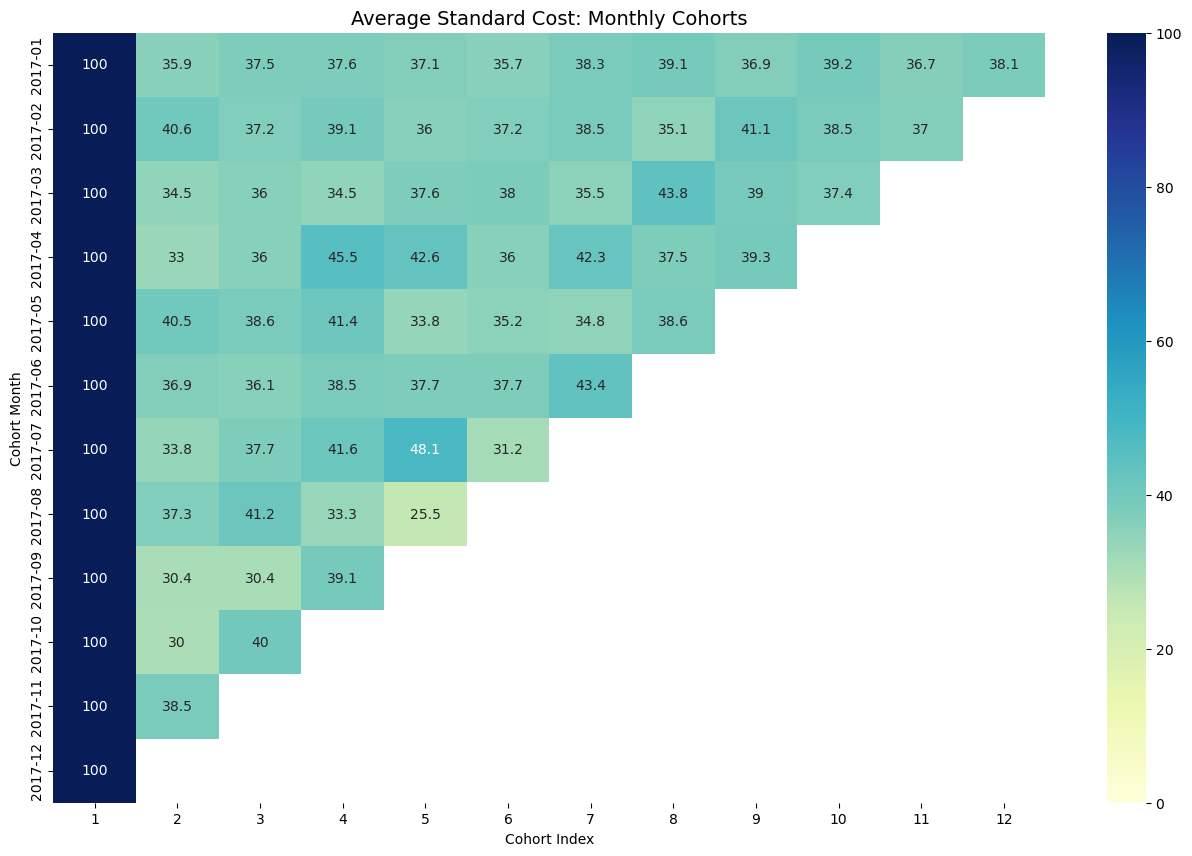

In [148]:
retention = retention.round(3)*100
retention.index = retention.index.strftime('%Y-%m')
# Initialize the figure
plt.figure(figsize=(16, 10))
# Adding a title
plt.title('Average Standard Cost: Monthly Cohorts', fontsize = 14)
# Creating the heatmap
sns.heatmap(retention, annot = True,vmin = 0.0, vmax =100,cmap="YlGnBu", fmt='g')
plt.ylabel('Cohort Month')
plt.xlabel('Cohort Index')

plt.yticks(rotation='vertical')
plt.ylabel('Cohort Month')
plt.xlabel('Cohort Index')
plt.yticks(rotation='vertical')  # Correct way to make labels vertical
plt.show()


In [99]:
df_48 = transaction_df[(transaction_df['CohortMonth'] == '2017-07-01') & (transaction_df['CohortIndex'] == 5)]
df_48.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,TransactionMonth,CohortMonth,CohortIndex
1750,1751,22,2730,2017-11-21,0.0,Approved,WeareA2B,Standard,medium,medium,60.34,45.26,34165.0,2017-11-01,2017-07-01,5
2160,2161,98,2694,2017-11-22,0.0,Approved,Trek Bicycles,Standard,high,medium,358.39,215.03,38002.0,2017-11-01,2017-07-01,5
2561,2562,35,2514,2017-11-14,1.0,Approved,Giant Bicycles,Standard,medium,medium,1403.50,954.82,37659.0,2017-11-01,2017-07-01,5
3035,3036,27,2730,2017-11-21,0.0,Approved,Trek Bicycles,Standard,medium,medium,499.53,388.72,36334.0,2017-11-01,2017-07-01,5
3397,3398,51,1809,2017-11-20,0.0,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,34170.0,2017-11-01,2017-07-01,5


In [100]:
df_31 = transaction_df[(transaction_df['CohortMonth'] == '2017-07-01') & (transaction_df['CohortIndex'] == 6)]
df_31.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,TransactionMonth,CohortMonth,CohortIndex
121,122,24,1038,2017-12-01,1.0,Approved,Solex,Road,medium,large,1777.80,820.78,34115.0,2017-12-01,2017-07-01,6
1067,1068,96,2215,2017-12-11,1.0,Approved,WeareA2B,Road,low,small,1172.78,1043.77,38002.0,2017-12-01,2017-07-01,6
1091,1092,92,3395,2017-12-21,0.0,Approved,WeareA2B,Standard,medium,small,1415.01,1259.36,37626.0,2017-12-01,2017-07-01,6
2132,2133,85,2694,2017-12-01,0.0,Approved,WeareA2B,Standard,medium,medium,752.64,205.36,42218.0,2017-12-01,2017-07-01,6
2136,2137,57,1963,2017-12-21,1.0,Approved,WeareA2B,Touring,medium,large,1890.39,260.14,33259.0,2017-12-01,2017-07-01,6


In [101]:
df_31_cst=pd.merge(df_31,rfm_customer2,how='outer',on='customer_id')
df_31_cst.head()

,transaction_id_x,product_id_x,customer_id,transaction_date_x,online_order_x,order_status_x,brand_x,product_line_x,product_class_x,product_size_x,...,brand_y,product_line_y,product_class_y,product_size_y,list_price_y,standard_cost_y,product_first_sold_date_y,TransactionMonth_y,CohortMonth_y,CohortIndex_y
0,122.0,24.0,1038,2017-12-01,1.0,Approved,Solex,Road,medium,large,...,Solex,Road,medium,large,1777.80,820.78,34115.0,2017-12-01,2017-07-01,6
1,122.0,24.0,1038,2017-12-01,1.0,Approved,Solex,Road,medium,large,...,Giant Bicycles,Standard,high,small,1977.36,1759.85,34143.0,2017-11-01,2017-07-01,5
2,122.0,24.0,1038,2017-12-01,1.0,Approved,Solex,Road,medium,large,...,Norco Bicycles,Standard,high,medium,1148.64,689.18,34079.0,2017-12-01,2017-07-01,6
3,122.0,24.0,1038,2017-12-01,1.0,Approved,Solex,Road,medium,large,...,Norco Bicycles,Road,medium,large,1240.31,795.10,37873.0,2017-07-01,2017-07-01,1
4,12141.0,82.0,1038,2017-12-18,0.0,Approved,Norco Bicycles,Standard,high,medium,...,Solex,Road,medium,large,1777.80,820.78,34115.0,2017-12-01,2017-07-01,6


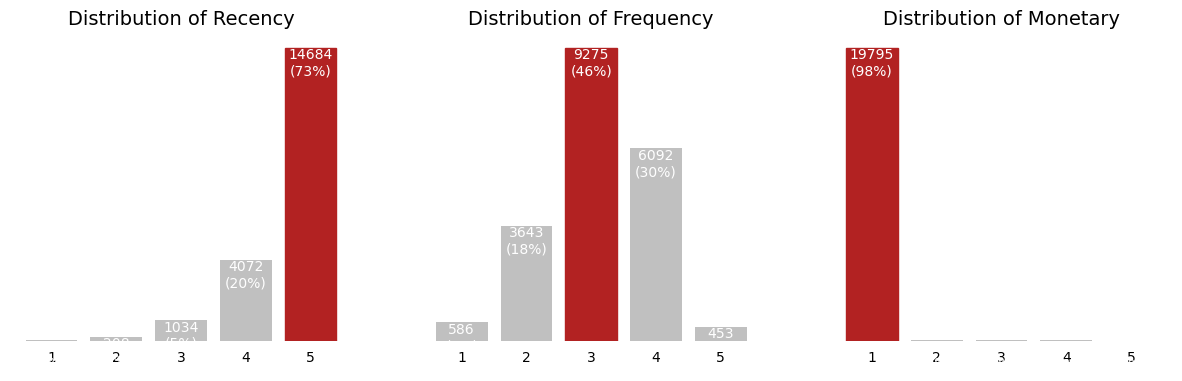

In [137]:
# plot the distribution of customers over R and F
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))

parameters = {'R_score':'Recency', 'F_score':'Frequency','M_score':'Monetary'}

for i, p in enumerate(['R_score','F_score','M_score']):
    
    y = df_31_cst[p].value_counts().sort_index()
    x = y.index
    ax = axes[i]
    bars = ax.bar(x, y, color='silver')
    ax.set_frame_on(False)
    ax.tick_params(left=False, labelleft=False, bottom=False)
    ax.set_title('Distribution of {}'.format(parameters[p]),fontsize=14)
    for bar in bars:
        value = bar.get_height()
        if value == y.max():
            bar.set_color('firebrick')
        ax.text(bar.get_x() + bar.get_width() / 2,
                value - 5,
                '{}\n({}%)'.format(int(value), int(value * 100 / y.sum())),
               ha='center',
               va='top',
               color='w')

plt.show()


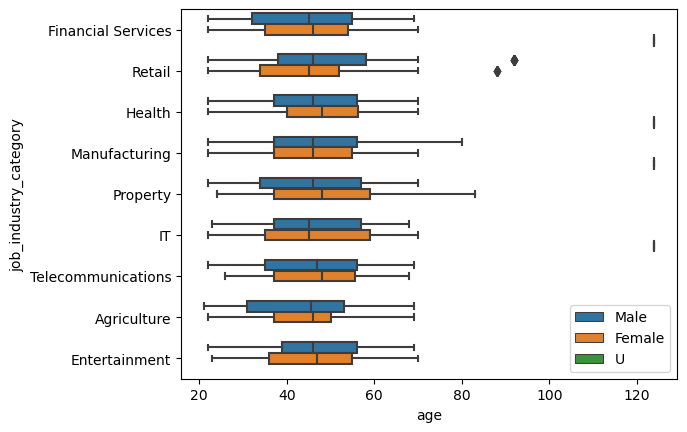

In [142]:
# job_industry_category箱型图 竖着就看不完整标签 
sns.boxplot(x='age',y='job_industry_category',hue='gender',data=df_48_cst)
plt.legend(loc = 'best')

In [133]:
df_48_cst=pd.merge(df_48,rfm_customer2,how='outer',on='customer_id')
df_48_cst.head()

,transaction_id_x,product_id_x,customer_id,transaction_date_x,online_order_x,order_status_x,brand_x,product_line_x,product_class_x,product_size_x,...,brand_y,product_line_y,product_class_y,product_size_y,list_price_y,standard_cost_y,product_first_sold_date_y,TransactionMonth_y,CohortMonth_y,CohortIndex_y
0,1751.0,22.0,2730,2017-11-21,0.0,Approved,WeareA2B,Standard,medium,medium,...,WeareA2B,Standard,medium,medium,60.34,45.26,34165.0,2017-11-01,2017-07-01,5
1,1751.0,22.0,2730,2017-11-21,0.0,Approved,WeareA2B,Standard,medium,medium,...,Trek Bicycles,Standard,medium,medium,499.53,388.72,36334.0,2017-11-01,2017-07-01,5
2,1751.0,22.0,2730,2017-11-21,0.0,Approved,WeareA2B,Standard,medium,medium,...,Giant Bicycles,Standard,high,medium,1129.13,677.48,38573.0,2017-07-01,2017-07-01,1
3,1751.0,22.0,2730,2017-11-21,0.0,Approved,WeareA2B,Standard,medium,medium,...,Trek Bicycles,Standard,high,medium,495.72,297.43,42105.0,2017-12-01,2017-07-01,6
4,1751.0,22.0,2730,2017-11-21,0.0,Approved,WeareA2B,Standard,medium,medium,...,WeareA2B,Standard,medium,small,175.89,131.92,37668.0,2017-07-01,2017-07-01,1


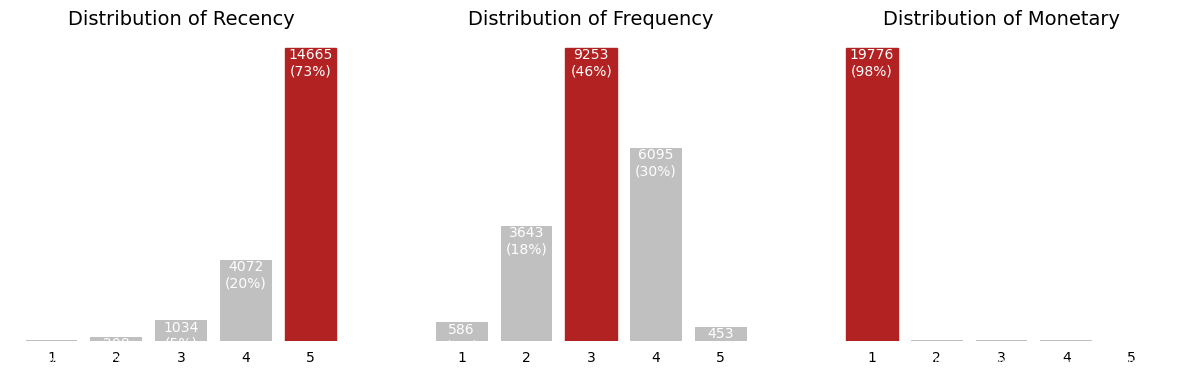

In [138]:
# plot the distribution of customers over R and F
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))

parameters = {'R_score':'Recency', 'F_score':'Frequency','M_score':'Monetary'}

for i, p in enumerate(['R_score','F_score','M_score']):
    
    y = df_48_cst[p].value_counts().sort_index()
    x = y.index
    ax = axes[i]
    bars = ax.bar(x, y, color='silver')
    ax.set_frame_on(False)
    ax.tick_params(left=False, labelleft=False, bottom=False)
    ax.set_title('Distribution of {}'.format(parameters[p]),fontsize=14)
    for bar in bars:
        value = bar.get_height()
        if value == y.max():
            bar.set_color('firebrick')
        ax.text(bar.get_x() + bar.get_width() / 2,
                value - 5,
                '{}\n({}%)'.format(int(value), int(value * 100 / y.sum())),
               ha='center',
               va='top',
               color='w')

plt.show()


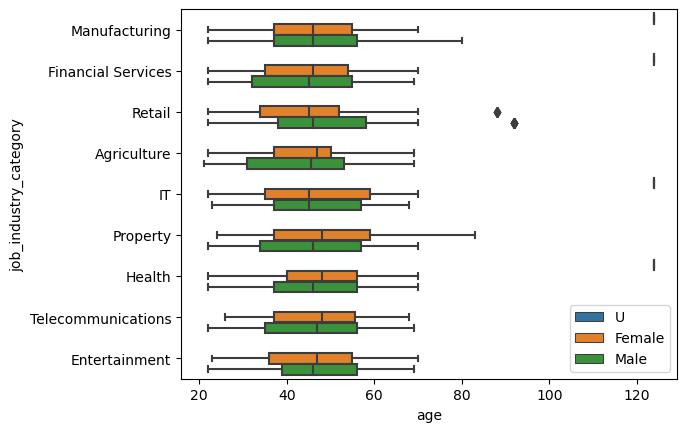

In [143]:
# job_industry_category箱型图 竖着就看不完整标签 
sns.boxplot(x='age',y='job_industry_category',hue='gender',data=df_31_cst)
plt.legend(loc = 'best')

In [134]:
# sum of df_48
m_sum_48 = df_48_cst.groupby(['customer_id'])['list_price_y'].sum().reset_index(name='total_amount_y')
m_sum_48

,customer_id,total_amount1
0,1,9084.45
1,2,4149.07
2,3,9888.23
3,4,1047.72
4,5,5903.20
...,...,...
3488,3496,4725.38
3489,3497,3744.07
3490,3498,5177.06
3491,3499,7673.48


In [136]:
# sun of df_31
m_sum_31 = df_31_cst.groupby(['customer_id'])['list_price_y'].sum().reset_index(name='total_amount_x')
m_sum_31

,customer_id,total_amount_x
0,1,9084.45
1,2,4149.07
2,3,9888.23
3,4,1047.72
4,5,5903.20
...,...,...
3488,3496,4725.38
3489,3497,3744.07
3490,3498,5177.06
3491,3499,7673.48


In [105]:
#rfm modle
r=transaction_df.groupby('customer_id')['transaction_date'].max().reset_index()
r.head()

,customer_id,transaction_date
0,1,2017-12-23
1,2,2017-08-24
2,3,2017-09-19
3,4,2017-06-18
4,5,2017-12-14


In [49]:
#the last day of transaction_date
r.transaction_date.max()

Timestamp('2017-12-30 00:00:00')

In [50]:
#r
r['R']=(pd.to_datetime('2017-12-30')-r['transaction_date']).dt.days
r.sample()
r

,customer_id,transaction_date,R
0,1,2017-12-23,7
1,2,2017-08-24,128
2,3,2017-09-19,102
3,4,2017-06-18,195
4,5,2017-12-14,16
...,...,...,...
3489,3497,2017-11-08,52
3490,3498,2017-08-25,127
3491,3499,2017-11-09,51
3492,3500,2017-08-08,144


In [51]:
#f
f=df2.groupby(['customer_id','transaction_date']).size().reset_index(name='trade_num')
f.query('customer_id==1')
f=f.groupby(['customer_id'])[['trade_num']].sum().reset_index()
f.head()
f=f.rename(columns={'trade_num':'f'})
f.head()

,customer_id,f
0,1,11
1,2,3
2,3,8
3,4,2
4,5,6


In [52]:
#total_amount
m_sum=df2.groupby(['customer_id'])['list_price'].sum().reset_index(name='total_amount')
m_sum.head()

,customer_id,total_amount
0,1,9084.45
1,2,4149.07
2,3,9888.23
3,4,1047.72
4,5,5903.20


In [53]:
#m
m_sum['M']=m_sum['total_amount']/f['f']
m_sum.head()

,customer_id,total_amount,M
0,1,9084.45,825.859091
1,2,4149.07,1383.023333
2,3,9888.23,1236.028750
3,4,1047.72,523.860000
4,5,5903.20,983.866667


In [58]:
#combine table
f_total=pd.merge(f,m_sum,on='customer_id',how='inner')
f_total.head()
r
fm=pd.merge(f_total,r,on='customer_id',how='inner')

rfm=pd.merge(f_total,r,on='customer_id',how='inner')

rfm.head()
rfm=rfm[['customer_id','f','M','R']]
rfm

,customer_id,f,M,R
0,1,11,825.859091,7
1,2,3,1383.023333,128
2,3,8,1236.028750,102
3,4,2,523.860000,195
4,5,6,983.866667,16
...,...,...,...,...
3489,3497,3,NaN,52
3490,3498,6,NaN,127
3491,3499,7,NaN,51
3492,3500,6,NaN,144


<Axes: >

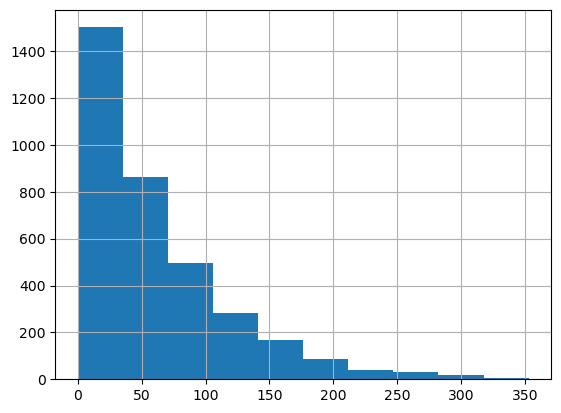

In [59]:
rfm.R.hist()

<Axes: >

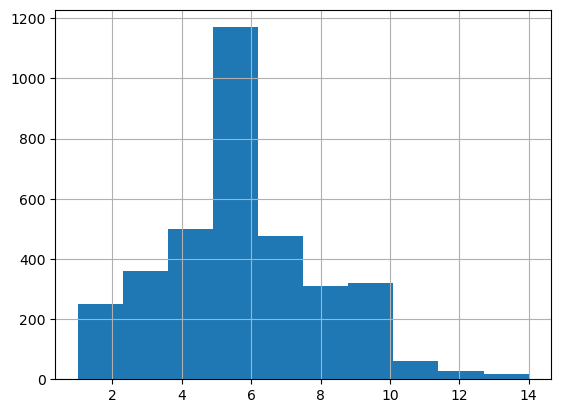

In [133]:
rfm.f.hist()

<Axes: >

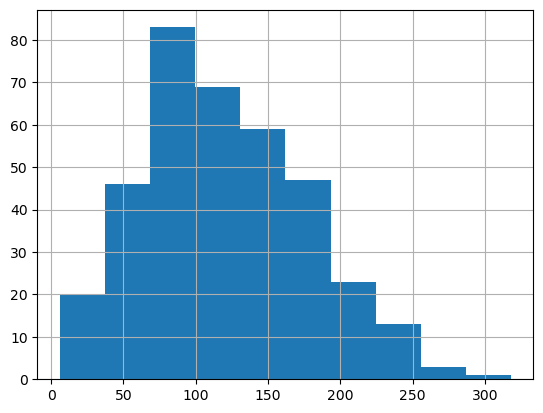

In [134]:
rfm.M.hist()

In [60]:
rfm['R_score']=pd.cut(rfm['R'],bins=[0,70,140,210,280,350],labels=[5,4,3,2,1],right = False).astype(float)
rfm.head()

,customer_id,f,M,R,R_score
0,1,11,825.859091,7,5.0
1,2,3,1383.023333,128,4.0
2,3,8,1236.028750,102,4.0
3,4,2,523.860000,195,3.0
4,5,6,983.866667,16,5.0


In [61]:
rfm['F_score']=pd.cut(rfm['f'],bins=[0,3,6,9,12,15],labels=[5,4,3,2,1],right=False).astype(float)
rfm.head()

,customer_id,f,M,R,R_score,F_score
0,1,11,825.859091,7,5.0,2.0
1,2,3,1383.023333,128,4.0,4.0
2,3,8,1236.028750,102,4.0,3.0
3,4,2,523.860000,195,3.0,5.0
4,5,6,983.866667,16,5.0,3.0


In [62]:
rfm['M_score']=pd.cut(rfm['M'],bins=[0,70,140,210,280,50000],labels=[5,4,3,2,1],right=False).astype(float)
rfm.head()

,customer_id,f,M,R,R_score,F_score,M_score
0,1,11,825.859091,7,5.0,2.0,1.0
1,2,3,1383.023333,128,4.0,4.0,1.0
2,3,8,1236.028750,102,4.0,3.0,1.0
3,4,2,523.860000,195,3.0,5.0,1.0
4,5,6,983.866667,16,5.0,3.0,1.0


In [63]:
rfm['R_above_mean']=(rfm['R_score']>rfm['R_score'].mean())*1
rfm['F_above_mean']=(rfm['F_score']>rfm['F_score'].mean())*1
rfm['M_above_mean']=(rfm['M_score']>rfm['M_score'].mean())*1
rfm.head()
print(rfm.columns)

Index(['customer_id', 'f', 'M', 'R', 'R_score', 'F_score', 'M_score',
       'R_above_mean', 'F_above_mean', 'M_above_mean'],
      dtype='object')


In [64]:
rfm['total_score']=(rfm['R_above_mean'])*100+(rfm['F_above_mean'])*10+(rfm['M_above_mean'])
rfm

,customer_id,f,M,R,R_score,F_score,M_score,R_above_mean,F_above_mean,M_above_mean,total_score
0,1,11,825.859091,7,5.0,2.0,1.0,1,0,0,100
1,2,3,1383.023333,128,4.0,4.0,1.0,0,1,0,10
2,3,8,1236.028750,102,4.0,3.0,1.0,0,0,0,0
3,4,2,523.860000,195,3.0,5.0,1.0,0,1,0,10
4,5,6,983.866667,16,5.0,3.0,1.0,1,0,0,100
...,...,...,...,...,...,...,...,...,...,...,...
3489,3497,3,NaN,52,5.0,4.0,NaN,1,1,0,110
3490,3498,6,NaN,127,4.0,3.0,NaN,0,0,0,0
3491,3499,7,NaN,51,5.0,3.0,NaN,1,0,0,100
3492,3500,6,NaN,144,3.0,3.0,NaN,0,0,0,0


In [65]:
#check R/F/M 
cumid_label={111:'Key valuable customer',110:'General valuable customer',101:'Key potential customer', 100:'General potential customer',11:'Key loyal customer',10:'General loyal customer',
1:'Key at risk customer',0:'General at risk customer'}
rfm['customer_type']=rfm['total_score'].map(cumid_label)
rfm.head()

,customer_id,f,M,R,R_score,F_score,M_score,R_above_mean,F_above_mean,M_above_mean,total_score,customer_type
0,1,11,825.859091,7,5.0,2.0,1.0,1,0,0,100,General potential customer
1,2,3,1383.023333,128,4.0,4.0,1.0,0,1,0,10,General loyal customer
2,3,8,1236.028750,102,4.0,3.0,1.0,0,0,0,0,General at risk customer
3,4,2,523.860000,195,3.0,5.0,1.0,0,1,0,10,General loyal customer
4,5,6,983.866667,16,5.0,3.0,1.0,1,0,0,100,General potential customer


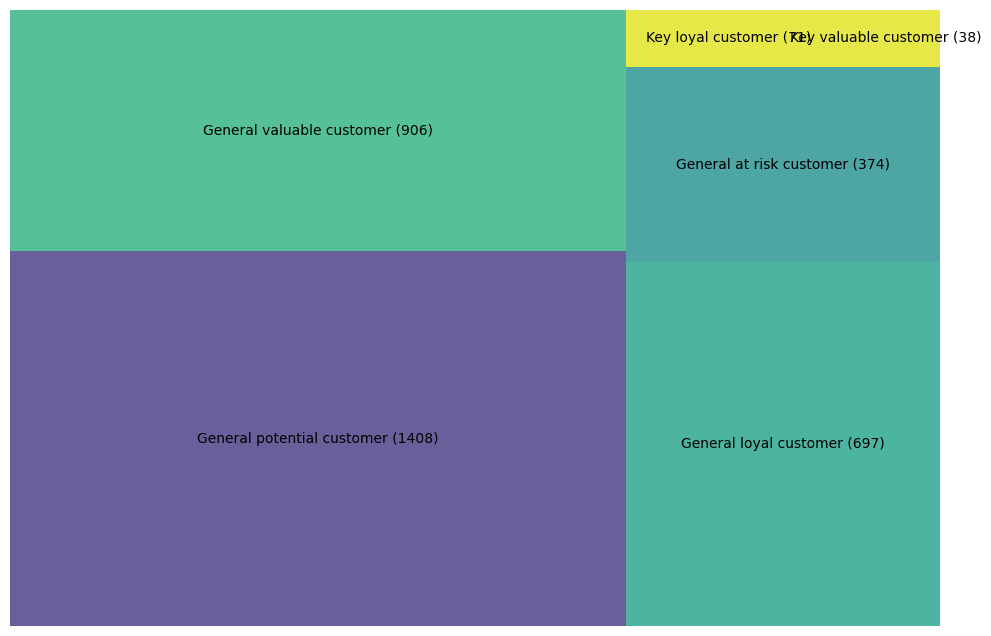

In [66]:
import matplotlib.pyplot as plt
import squarify

# Assuming 'rfm' is your DataFrame and you're interested in the distribution of 'customer_type'
# First, aggregate the data to get sizes for each 'customer_type'
sizes = rfm['customer_type'].value_counts()

# Generate labels for each segment with percentage
labels = [f'{label} ({size})' for label, size in sizes.items()]

# Create the treemap
plt.figure(figsize=(12, 8))
squarify.plot(sizes=sizes, label=labels, alpha=0.8)
plt.axis('off')
plt.show()

In [67]:
count=rfm['customer_type'].value_counts().reset_index()
count.columns=['customer_type','total']
count['total_percent']=count['total']/count['total'].sum()
count

,customer_type,total,total_percent
0,General potential customer,1408,0.402977
1,General valuable customer,906,0.259302
2,General loyal customer,697,0.199485
3,General at risk customer,374,0.107041
4,Key loyal customer,71,0.020321
5,Key valuable customer,38,0.010876


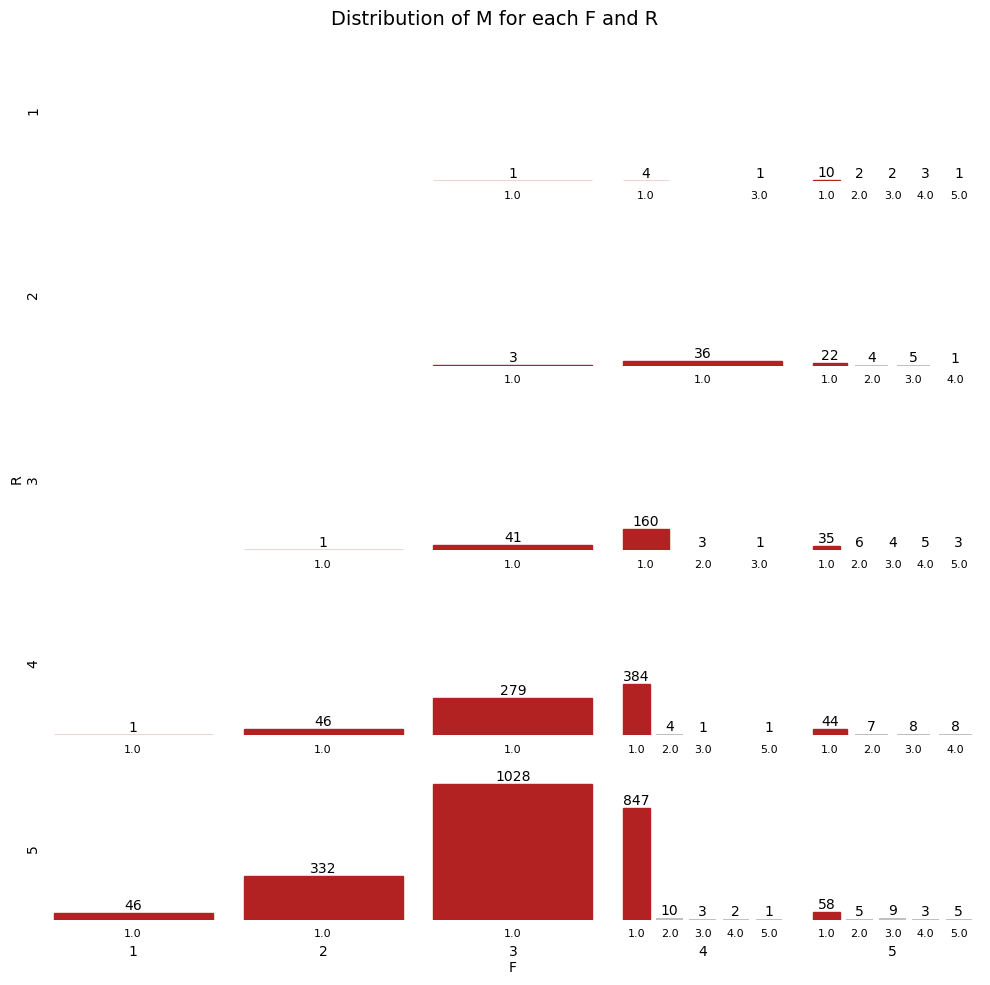

In [68]:
fig, axes = plt.subplots(nrows=5, ncols=5,
                         sharex=False, sharey=True,
                         figsize=(10, 10))

r_range = range(1, 6)
f_range = range(1, 6)
for r in r_range:
    for f in f_range:
        y = rfm[(rfm['R_score'] == r) & (rfm['F_score'] == f)]['M_score'].value_counts().sort_index()
        x = y.index
        ax = axes[r - 1, f - 1]
        bars = ax.bar(x, y, color='silver')
        if r == 5:
            if f == 3:
                ax.set_xlabel('{}\nF'.format(f), va='top')
            else:
                ax.set_xlabel('{}\n'.format(f), va='top')
        if f == 1:
            if r == 3:
                ax.set_ylabel('R\n{}'.format(r))
            else:
                ax.set_ylabel(r)
        ax.set_frame_on(False)
        ax.tick_params(left=False, labelleft=False, bottom=False)
        ax.set_xticks(x)
        ax.set_xticklabels(x, fontsize=8)

        for bar in bars:
            value = bar.get_height()
            if value == y.max():
                bar.set_color('firebrick')
            ax.text(bar.get_x() + bar.get_width() / 2,
                    value,
                    int(value),
                    ha='center',
                    va='bottom',
                    color='k')
fig.suptitle('Distribution of M for each F and R',
             fontsize=14)
plt.tight_layout()
plt.show()


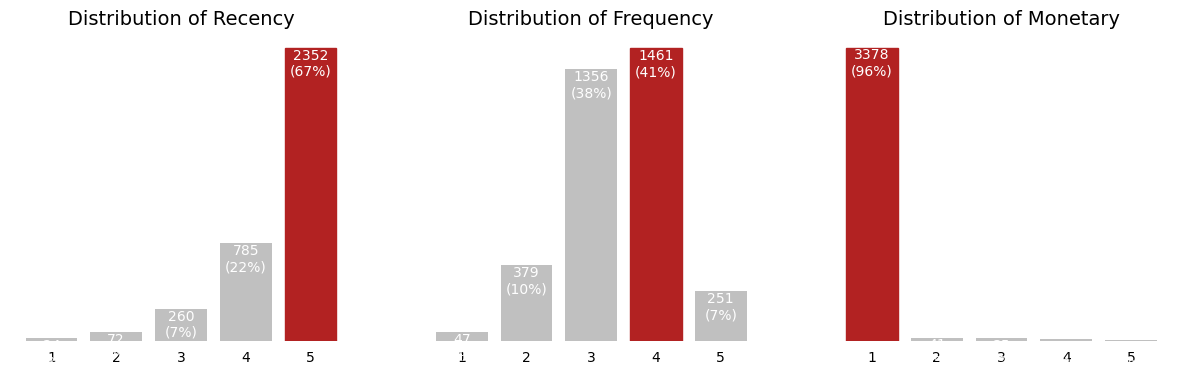

In [69]:
# plot the distribution of customers over R and F
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))

parameters = {'R_score':'Recency', 'F_score':'Frequency','M_score':'Monetary'}

for i, p in enumerate(['R_score','F_score','M_score']):
    
    y = rfm[p].value_counts().sort_index()
    x = y.index
    ax = axes[i]
    bars = ax.bar(x, y, color='silver')
    ax.set_frame_on(False)
    ax.tick_params(left=False, labelleft=False, bottom=False)
    ax.set_title('Distribution of {}'.format(parameters[p]),fontsize=14)
    for bar in bars:
        value = bar.get_height()
        if value == y.max():
            bar.set_color('firebrick')
        ax.text(bar.get_x() + bar.get_width() / 2,
                value - 5,
                '{}\n({}%)'.format(int(value), int(value * 100 / y.sum())),
               ha='center',
               va='top',
               color='w')

plt.show()


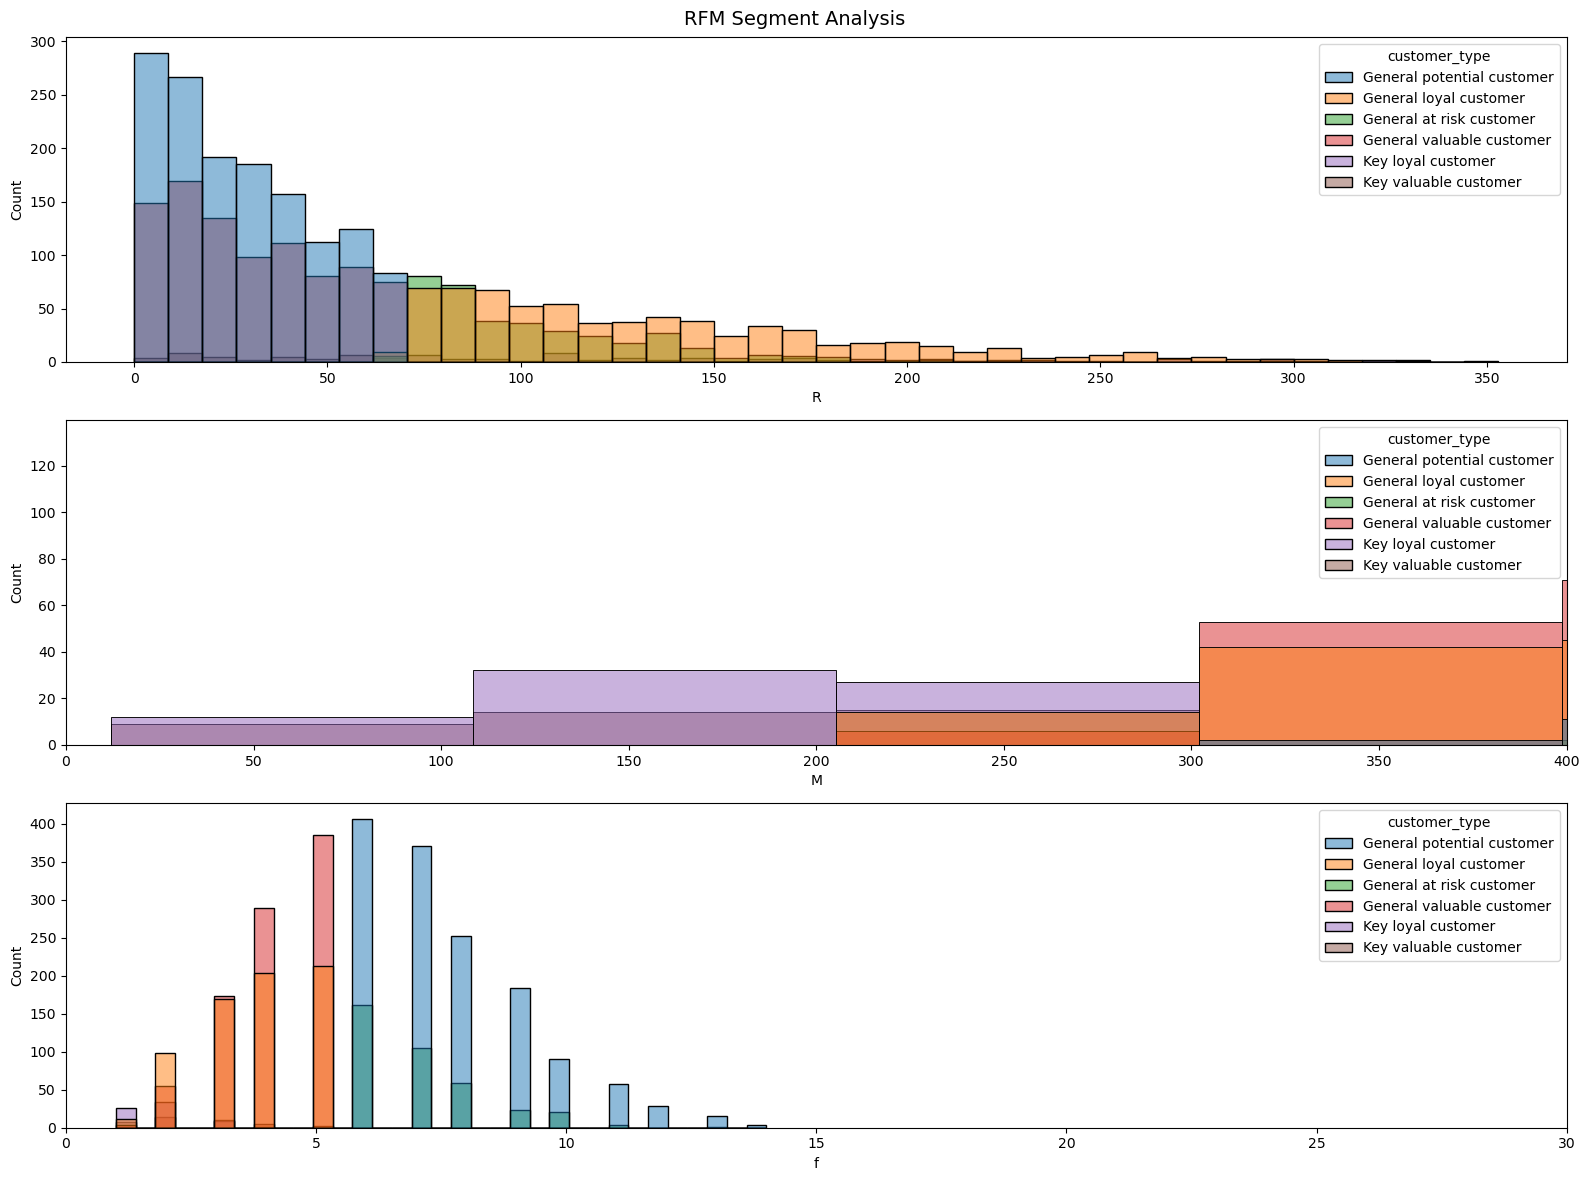

In [70]:
#RFM Segment Analysis
fig, axes = plt.subplots(3, 1, figsize=(16, 12))
fig.suptitle('RFM Segment Analysis', size = 14)
feature_list = ['R', 'M', 'f']
for idx, col in enumerate(feature_list):
    sns.histplot(ax = axes[idx], data = rfm,
                 hue = 'customer_type', x = feature_list[idx],
                )
    if idx == 1:
        axes[idx].set_xlim([0, 400])
    if idx == 2:
        axes[idx].set_xlim([0, 30])
plt.tight_layout()
plt.show()


In [71]:
rfm_customer=pd.merge(rfm,CustomerDemographic_df,on='customer_id',how='inner')
rfm_customer.head()
print(rfm_customer.columns)
rfm_customer2=pd.merge(rfm_customer,transaction_df,on='customer_id',how='inner')
print(rfm_customer2.columns)

Index(['customer_id', 'f', 'M', 'R', 'R_score', 'F_score', 'M_score',
       'R_above_mean', 'F_above_mean', 'M_above_mean', 'total_score',
       'customer_type', 'name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'age', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure'],
      dtype='object')
Index(['customer_id', 'f', 'M', 'R', 'R_score', 'F_score', 'M_score',
       'R_above_mean', 'F_above_mean', 'M_above_mean', 'total_score',
       'customer_type', 'name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'age', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'transaction_id', 'product_id',
       'transaction_date', 'online_order', 'order_status', 'brand',
       'product_line', 'product_class', 'product_size', 'list_price',
       'standard_cost', 'product_first_sold_date', 'TransactionMonth',
       'CohortMonth', 'C

In [72]:
# 筛选 customer_type 为 Key potential customer的客户
filtered_customers = rfm_customer2.loc[rfm_customer2['customer_type'] =='Key valuable customer']

# 显示筛选结果的前几行，以确认筛选是否成功
filtered_customers.head()

,customer_id,f,M,R,R_score,F_score,M_score,R_above_mean,F_above_mean,M_above_mean,...,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,TransactionMonth,CohortMonth,CohortIndex
5021,862,1,193.632500,54,5.0,5.0,3.0,1,1,1,...,Norco Bicycles,Road,high,large,774.53,464.72,41009.0,2017-11-01,2017-11-01,1
5216,900,4,271.826667,12,5.0,4.0,2.0,1,1,1,...,Norco Bicycles,Mountain,low,small,688.63,612.88,36334.0,2017-09-01,2017-01-01,9
5217,900,4,271.826667,12,5.0,4.0,2.0,1,1,1,...,Norco Bicycles,Standard,low,medium,363.01,290.41,36367.0,2017-01-01,2017-01-01,1
5218,900,4,271.826667,12,5.0,4.0,2.0,1,1,1,...,Solex,Standard,medium,medium,1163.89,589.27,41345.0,2017-08-01,2017-01-01,8
5219,900,4,271.826667,12,5.0,4.0,2.0,1,1,1,...,Giant Bicycles,Standard,medium,medium,230.91,173.18,39031.0,2017-12-01,2017-01-01,12


In [73]:
count=rfm_customer2['customer_type'].value_counts().reset_index()
count.columns=['customer_type','total']
count['total_percent']=count['total']/count['total'].sum()
count

,customer_type,total,total_percent
0,General potential customer,10821,0.541131
1,General valuable customer,3718,0.185928
2,General at risk customer,2642,0.132120
3,General loyal customer,2595,0.129769
4,Key loyal customer,128,0.006401
5,Key valuable customer,93,0.004651


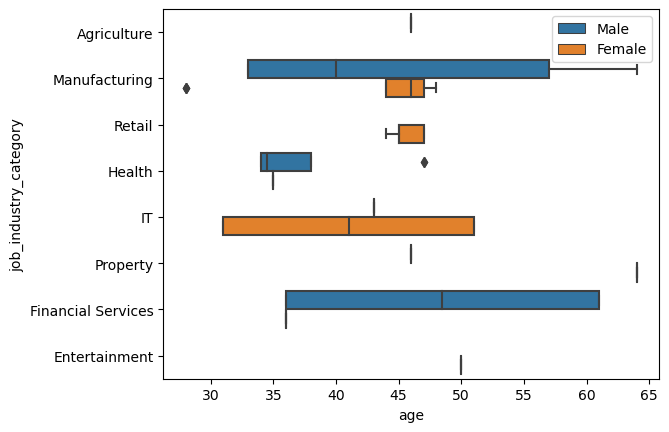

In [517]:
# Key valuable customer箱型图 竖着就看不完整标签 
sns.boxplot(x='age',y='job_industry_category',hue='gender',data=filtered_customers)
plt.legend(loc = 'best')

<Axes: xlabel='owns_car', ylabel='list_price'>

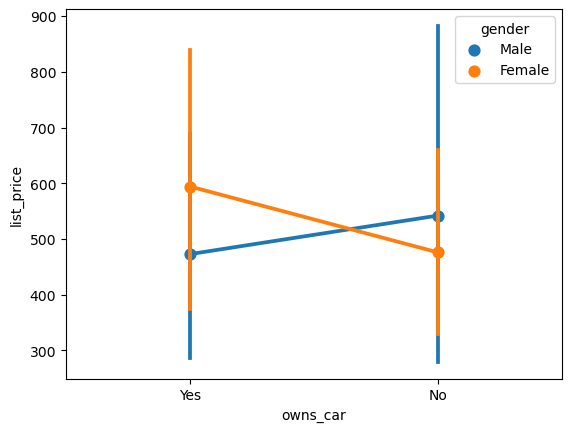

In [151]:
#Key potential customer list——price 
sns.pointplot(x='owns_car', y='list_price',hue='gender', data=filtered_customers, errorbar=('ci', 99))

<Axes: xlabel='age', ylabel='customer_type'>

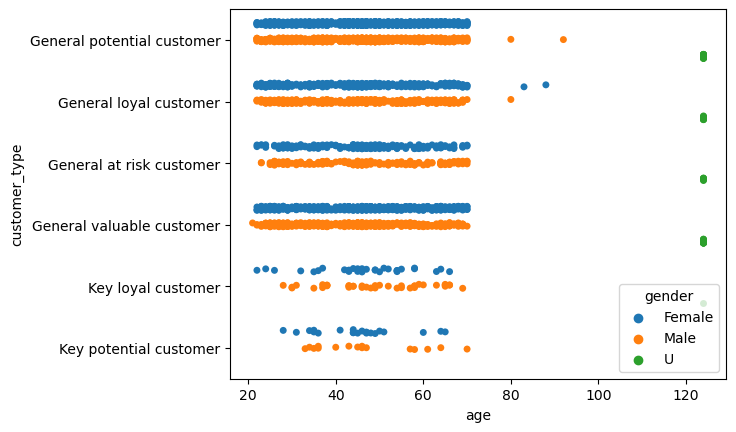

In [409]:
#customer_type &age
sns.stripplot(x='age',y='customer_type',hue='gender',data=rfm_customer,jitter=True,
                      color=None, size=5,dodge=True,
                      edgecolor="gray", linewidth=0)

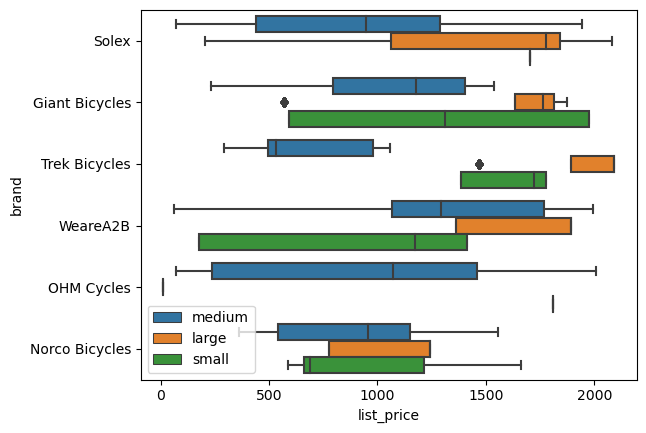

In [519]:
#品牌list_price 箱型图
sns.boxplot(x='list_price',y='brand',hue='product_size',data=df1)
plt.legend(loc = 'best')

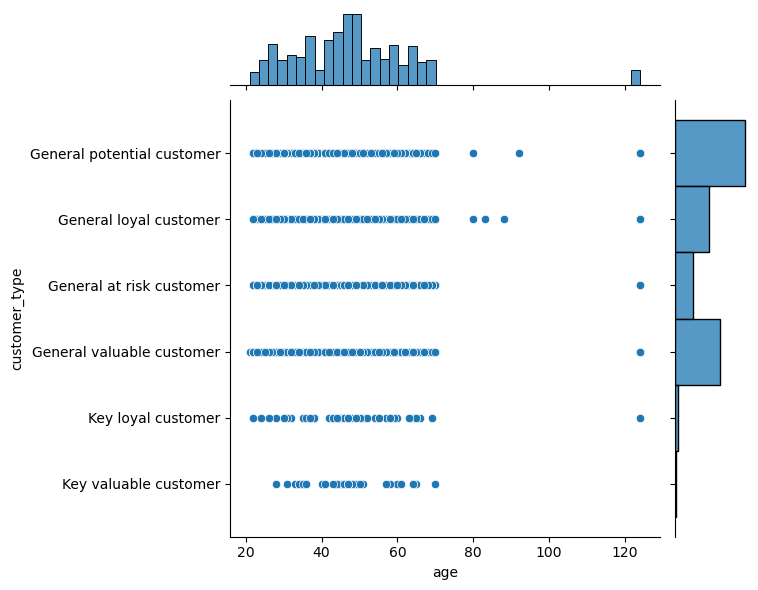

In [152]:
#age&customer_type
sns.jointplot(x='age',y='customer_type',data=rfm_customer)

<Axes: xlabel='brand', ylabel='count'>

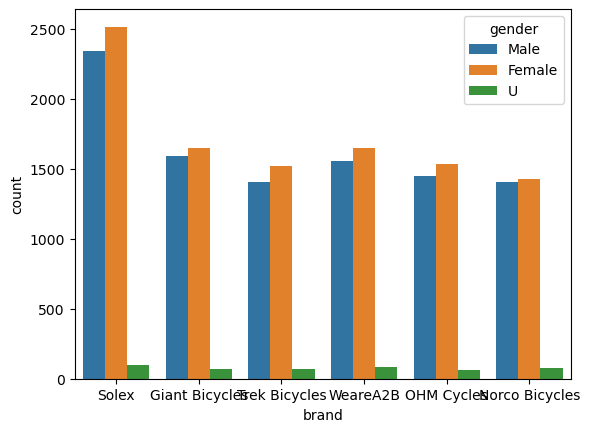

In [414]:
#brand&gender reletionship
sns.countplot(x='brand',hue='gender',data=df2)

<Axes: xlabel='age', ylabel='customer_type'>

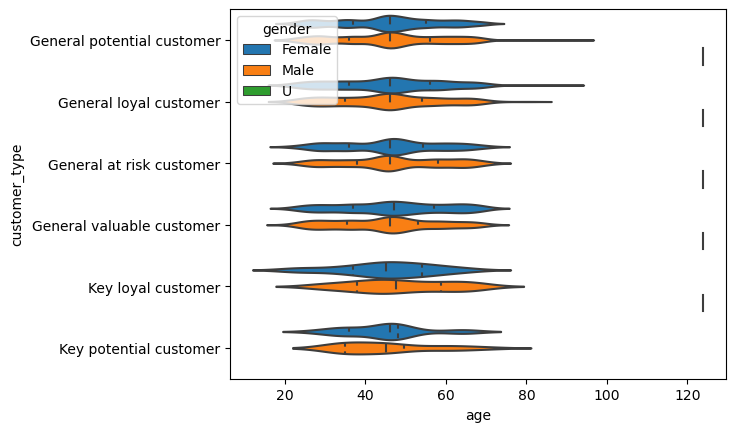

In [459]:
#age&customer_type
sns.violinplot(x='age',y='customer_type',
                hue='gender',data=rfm_customer2,
                  hue_order=None, scale="area",
                  scale_hue=True, gridsize=100,
                  width=.8, inner="quartile",saturation=.95)